In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../DATA/cancer_classification.csv')

# the usual steps:

## EDA
1. df.info() - check for nulls
2. df.descire() (with or without .transpose()) to check for values
3. with classification problems it's always good to check whether our data is ballanced with the sns.countplot()
4. check the df.corr() to check correlations of features. and plot it out, by checking the correlation with our predicting features - df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

## Preprocessing 
5. create X, y values
6. train, test split
7. Scale the data

## Modeling
8. import Sequential, Dense and Dropout
9. checking the shape of the data to fit enough input layers
10. fit the data
11. predict
12. test model performance


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

non of the features have null values

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

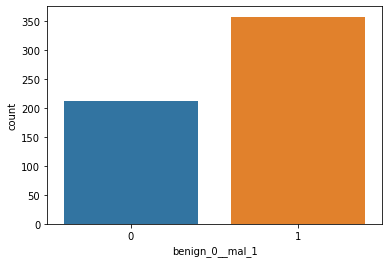

In [8]:
sns.countplot(data = df, x = 'benign_0__mal_1')

the data is relatively ballanced. even though there are more cases of malignant tumors

<AxesSubplot:>

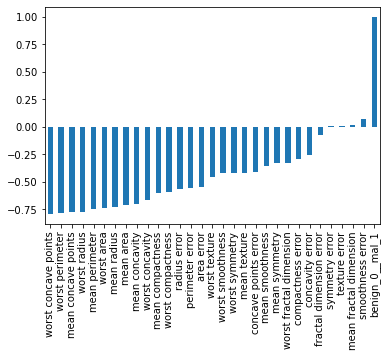

In [11]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

well the last feature is the feature we're trying to find correlation with, we'll drop it.

<AxesSubplot:>

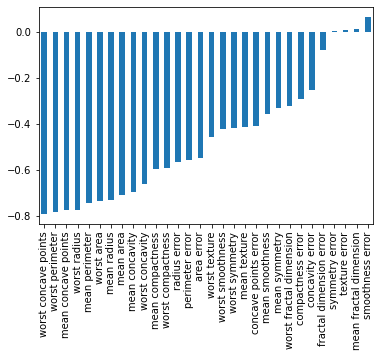

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

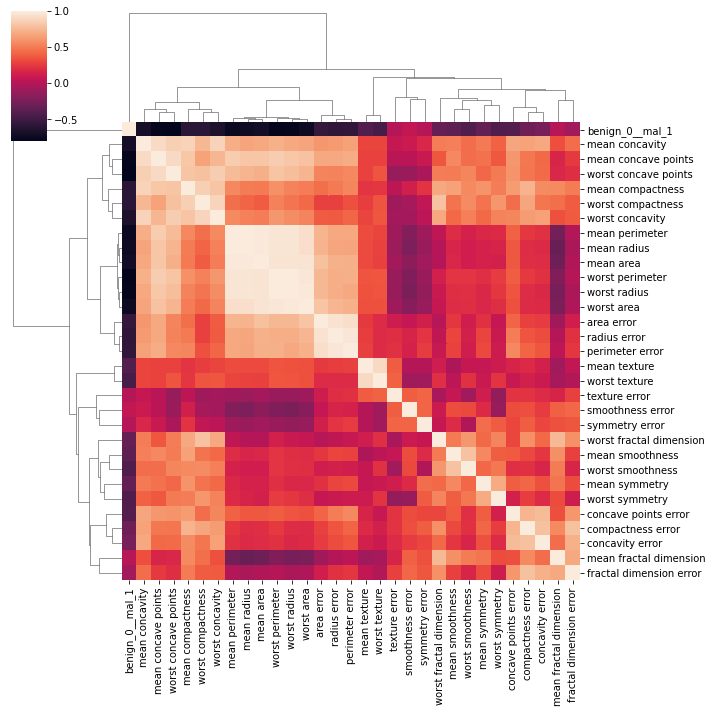

In [13]:
sns.clustermap(df.corr())

## Preprocessing

In [14]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

## Modeling

In [23]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense, Dropout

In [26]:
X_train.shape

(426, 30)

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification - 
# very important to choose an activation function - 'sigmoid'
model.add(Dense(1, activation='sigmoid'))
# binary - loss = 'binary_crossentropy'
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [28]:
# probably way too many epochs. we'll check that later.
model.fit(
    x = X_train,
    y = y_train, 
    epochs = 600,
    validation_data = (X_test, y_test)
)

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6719 - val_loss: 0.6497
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6321 - val_loss: 0.6109
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5928 - val_loss: 0.5679
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5500 - val_loss: 0.5226
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5002 - val_loss: 0.4710
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4507 - val_loss: 0.4231
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4052 - val_loss: 0.3770
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3668 - val_loss: 0.3317
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3243 - val_loss: 0.2934
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2962 - val_loss: 0.2632
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.1237
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0530 - val_loss: 0.1183
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0553 - val_loss: 0.1363
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0526 - val_loss: 0.1202
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0526 - val_loss: 0.1154
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.1268
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0554 - val_loss: 0.1144
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.1288
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0511 - val_loss: 0.1255
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0502 - val_loss: 0.1216
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.1717
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0441 - val_loss: 0.1464
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0450 - val_loss: 0.1535
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0433 - val_loss: 0.1489
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0464 - val_loss: 0.1385
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.1550
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1476
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0505 - val_loss: 0.1669
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.1570
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0482 - val_loss: 0.1682
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.1689
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.1859
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.1687
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.1648
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.1918
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.1568
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.1961
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.1616
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.1656
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.1759
Epoc

Epoch 326/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.1848
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.1978
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0357 - val_loss: 0.1938
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.1745
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.2186
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.1735
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0372 - val_loss: 0.2142
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.1890
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.1907
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0343 - val_los

14/14 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.2113
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.2083
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.2077
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0332 - val_loss: 0.2070
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.2051
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.2222
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.2186
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.2150
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.2113
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0369 - val_loss: 0.2018
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.2135
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.2469
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.2274
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.2497
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.2236
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.2271
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0333 - val_loss: 0.2071
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.2602
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.2310
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.2320
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.2490
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0260 - val_loss: 0.2398
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0330 - val_loss: 0.3013
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.2260
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.2572
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.2443
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 0.2492
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.2462
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.3138
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.2314
Epoc

In [29]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

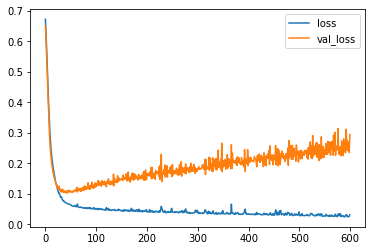

In [30]:
losses.plot()

## definatly we passed an overfit

we obviously trained too much the model on our training data, as we can see our validation losses get bigger and bigger from some point. 
we're going to use an early stopping.

we need to recreate our model from fresh.
copy and paste the lines of the model, and later use "callbacks"

In [31]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary Classification - 
# very important to choose an activation function - 'sigmoid'
model.add(Dense(1, activation='sigmoid'))
# binary - loss = 'binary_crossentropy'
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
#help(EarlyStopping)

the help is a really good way to learn about anythin. we'll use our val_loss as a monitor, and we'll also use 'patience' so that it will not abrupt the training but give it a try even after lowest loss is reached...

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=25)

### mode
it matters what we're tring to get. if the function is loss - it's something we want to **Minimize**
if it's Accuracy - it's something we want to **Maximize**

___
now we're going to use the fit(), with the early_stop variable we created. we're going to add the feature callbacks as a **list**, even if it's only one parameter

In [36]:
model.fit(
    x = X_train,
    y = y_train, 
    epochs = 600,
    validation_data = (X_test, y_test),
    callbacks = [early_stop]
)

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6964 - val_loss: 0.6743
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6521 - val_loss: 0.6380
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6163 - val_loss: 0.5983
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5698 - val_loss: 0.5409
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5177 - val_loss: 0.4876
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4700 - val_loss: 0.4387
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4204 - val_loss: 0.3897
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3782 - val_loss: 0.3461
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3390 - val_loss: 0.3079
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3070 - val_loss: 0.2759
Epoch 11/

it's a win win. 
first of all, we don't need to worry about overfitting and choose an arbitrary big number for epochs to train with.
second of all, it takes much less time.

now we'll check our model losses.

In [37]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

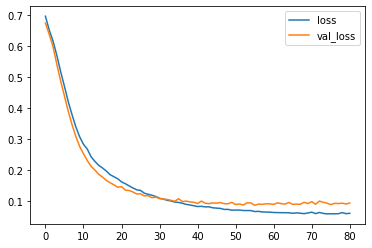

In [38]:
model_loss.plot()

it's ok that we have a little increase and a steadyv gap. what we want to prevent is the lines getting further and further apart.

___
# Dropout Layers
The last thing we can do is to use DROPOUT layers.
Dropout layers randomly turn off neurons in the layers.

we'll recreated the model again. copy paste and modify:

In [39]:
from tensorflow.keras.layers import Dropout # just to make it clear

In [40]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate = 0.5))
#rate - the fraction of which we're turning them off. 0 - nothing. 1 - all. 0.2-0.5 - commonly used
# rate=0.5, means that half of the 30 layers will randomly turned off
model.add(Dense(15, activation='relu'))
model.add(Dropout(rate = 0.5))


# Binary Classification - 
# very important to choose an activation function - 'sigmoid'
model.add(Dense(1, activation='sigmoid'))
# binary - loss = 'binary_crossentropy'
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

I'm going to use this in combination with early stopping as well

In [41]:
model.fit(
    x = X_train,
    y = y_train, 
    epochs = 600,
    validation_data = (X_test, y_test),
    callbacks = [early_stop]
)

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7188 - val_loss: 0.7021
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7012 - val_loss: 0.6853
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6952 - val_loss: 0.6652
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6677 - val_loss: 0.6450
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6424 - val_loss: 0.6197
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6220 - val_loss: 0.5811
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.5469
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5769 - val_loss: 0.5148
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5632 - val_loss: 0.4889
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5223 - val_loss: 0.4606
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1419 - val_loss: 0.0983
Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1411 - val_loss: 0.0982
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1310 - val_loss: 0.0932
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1050 - val_loss: 0.0952
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1231 - val_loss: 0.1064
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.0968
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.0896
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1268 - val_loss: 0.0882
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1394 - val_loss: 0.0875
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1048 - val_loss: 0.0914
Epoch 92/600


In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

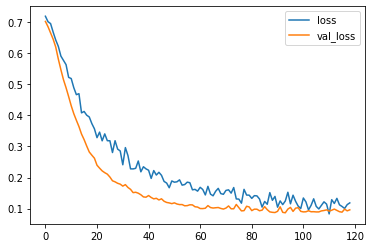

In [43]:
model_loss.plot()

THIS IS EXACTLY WHAT I WAS LOOKING FOR - THE MODEL REALLY LEARNS.

# Predicting
this is a classification problem. 
So I'm predicting classes. 1 or 0. malignant or benign.

with **keras** is not model.predict

but: model.predict(X_test) > 0.5 

In [48]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Evaluating the model

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[54  1]
 [ 2 86]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

